In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [5]:
test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [6]:
#save the id column and drop it from the data, since it is not necessary for prediction

train_ID = train['id']
test_ID = test['id']

train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

In [7]:
train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [8]:
test.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


# Analyzing the train data

In [9]:
train['price'].describe()

count    5.427300e+04
mean     3.921844e+04
std      7.282634e+04
min      2.000000e+03
25%      1.550000e+04
50%      2.800000e+04
75%      4.500000e+04
max      2.954083e+06
Name: price, dtype: float64

In [10]:
from scipy.stats import skew
from scipy.stats import norm
from scipy import stats

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\User\AppData\Local\Temp\ipykernel_4204\3436939792.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
C:\Users\User\AppData\Local\Temp\ipykernel_4204\3436939792.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['price'] , fit=norm);



 mu = 39218.44 and sigma = 72825.66



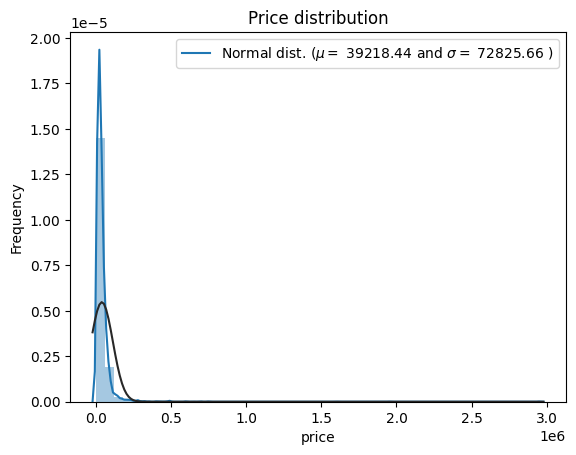

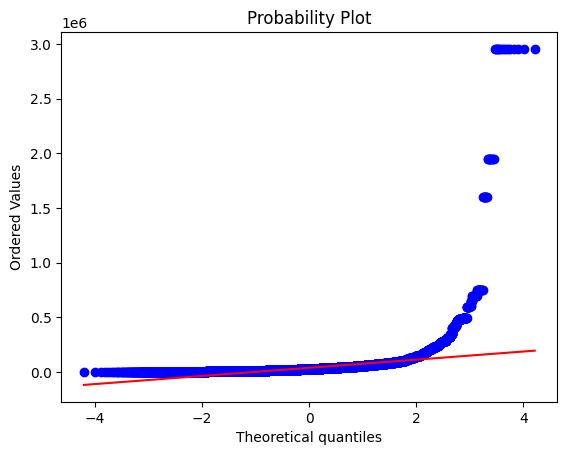

Skewness: 23.628974
Kurtosis: 825.930253


In [11]:
# Plot Histogram
sns.distplot(train['price'] , fit=norm);

# fitting prices to norma distribution and finding parameters
(mu, sigma) = norm.fit(train['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)
plt.show()

print("Skewness: %f" % train['price'].skew())
print("Kurtosis: %f" % train['price'].kurt())


# Observations

1. Most of the prices are concenterated on the towards lower and few are large values
2. Data does not fit on a normal distribution quite well, Since it have sharp peak and long tail on right
3. This high positive skewness indicates a long right tail, meaning there are many smaller values and a few very large values (outliers).
4. This extremely high kurtosis indicates that the distribution has heavy tails and a sharp peak, suggesting the presence of many outliers.

# Multivariable Analysis

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         54273 non-null  object
 1   model         54273 non-null  object
 2   model_year    54273 non-null  int64 
 3   milage        54273 non-null  int64 
 4   fuel_type     54273 non-null  object
 5   engine        54273 non-null  object
 6   transmission  54273 non-null  object
 7   ext_col       54273 non-null  object
 8   int_col       54273 non-null  object
 9   accident      54273 non-null  object
 10  clean_title   54273 non-null  object
 11  price         54273 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 5.0+ MB


In [13]:
#Categorical data
train.select_dtypes(include = ['object']).columns

Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')

In [14]:
#Numerical data
train.select_dtypes(include=['int64']).columns

Index(['model_year', 'milage', 'price'], dtype='object')

In [15]:
train['brand'].unique()

array(['Ford', 'BMW', 'Jaguar', 'Pontiac', 'Acura', 'Audi', 'GMC',
       'Maserati', 'Chevrolet', 'Porsche', 'Mercedes-Benz', 'Tesla',
       'Lexus', 'Kia', 'Lincoln', 'Dodge', 'Volkswagen', 'Land',
       'Cadillac', 'Mazda', 'RAM', 'Subaru', 'Hyundai', 'MINI', 'Jeep',
       'Honda', 'Hummer', 'Nissan', 'Toyota', 'Volvo', 'Genesis',
       'Mitsubishi', 'Buick', 'INFINITI', 'McLaren', 'Scion',
       'Lamborghini', 'Bentley', 'Suzuki', 'Ferrari', 'Alfa',
       'Rolls-Royce', 'Chrysler', 'Aston', 'Rivian', 'Lotus', 'Saturn',
       'Lucid', 'Mercury', 'Maybach', 'FIAT', 'Plymouth', 'Bugatti'],
      dtype=object)

In [16]:
# top 5 brand with their model and their price
train.sort_values(by='price',ascending=False)[['brand', 'model']].head(5)

,brand,model
39761,Chevrolet,Suburban 1500 LTZ
37341,Porsche,911 Carrera 4S
41065,Chevrolet,Tahoe LT
19661,Audi,A7 3.0T Premium Plus
5584,Mercedes-Benz,SL-Class SL500 Roadster


In [17]:
#Most used brand of cars
train['brand'].value_counts()

brand
BMW              7369
Ford             6706
Mercedes-Benz    5087
Chevrolet        4424
Audi             2922
Porsche          2627
Toyota           2315
Lexus            2257
Jeep             2247
Land             1995
Cadillac         1565
Nissan           1252
GMC              1076
Dodge            1011
RAM               966
INFINITI          957
Lincoln           767
Mazda             748
Subaru            739
Hyundai           694
Jaguar            661
Volkswagen        628
Honda             624
Acura             580
Kia               526
Volvo             452
MINI              364
Maserati          293
Bentley           284
Chrysler          258
Genesis           249
Buick             228
Mitsubishi        182
Hummer            176
Pontiac           149
Alfa              144
Rolls-Royce       142
Lamborghini       122
Tesla             110
Ferrari            87
Saturn             58
Scion              53
Aston              50
McLaren            43
Rivian             27
Merc

Hence, top 10 most used car brands are 
BMW              7369
Ford             6706
Mercedes-Benz    5087
Chevrolet        4424
Audi             2922
Porsche          2627
Toyota           2315
Lexus            2257
Jeep             2247
Land             1995
Cadillac         1565


In [18]:
train['fuel_type'].unique()

array(['Gasoline', 'Hybrid', 'E85 Flex Fuel', 'Diesel', '–',
       'Plug-In Hybrid', 'not supported'], dtype=object)

<Axes: xlabel='fuel_type', ylabel='count'>

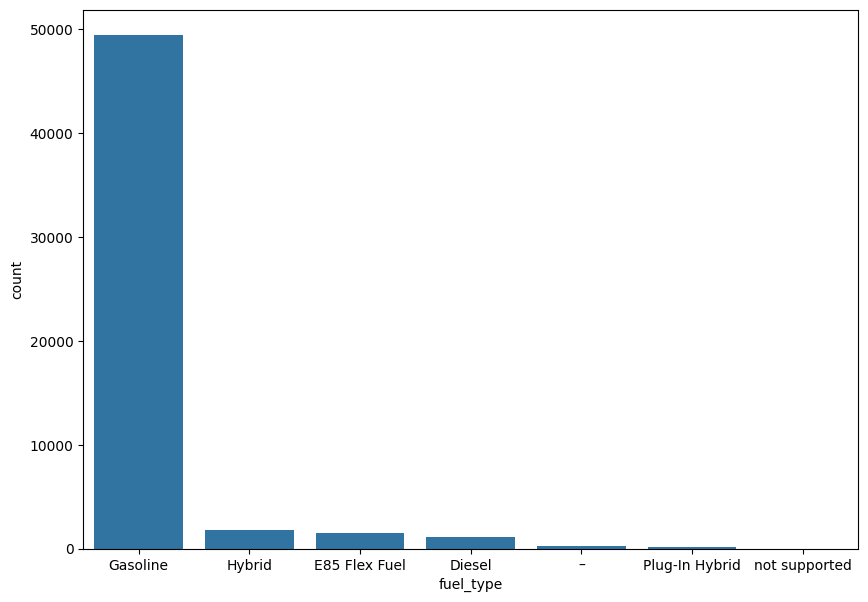

In [19]:
plt.figure(figsize=(10,7))
sns.countplot(data=train, x='fuel_type')

Most cars fuel type is Gasoline 

In [20]:
train['clean_title'].unique()

array(['Yes'], dtype=object)

In [21]:
#Since column clean title has only one value so it is not relevant for price prediction, so we can drop it
#train.drop('clean_title', axis=1, inplace=True)

In [22]:
#train.head()

Text(0.5, 1.0, 'Milage of Each Brands')

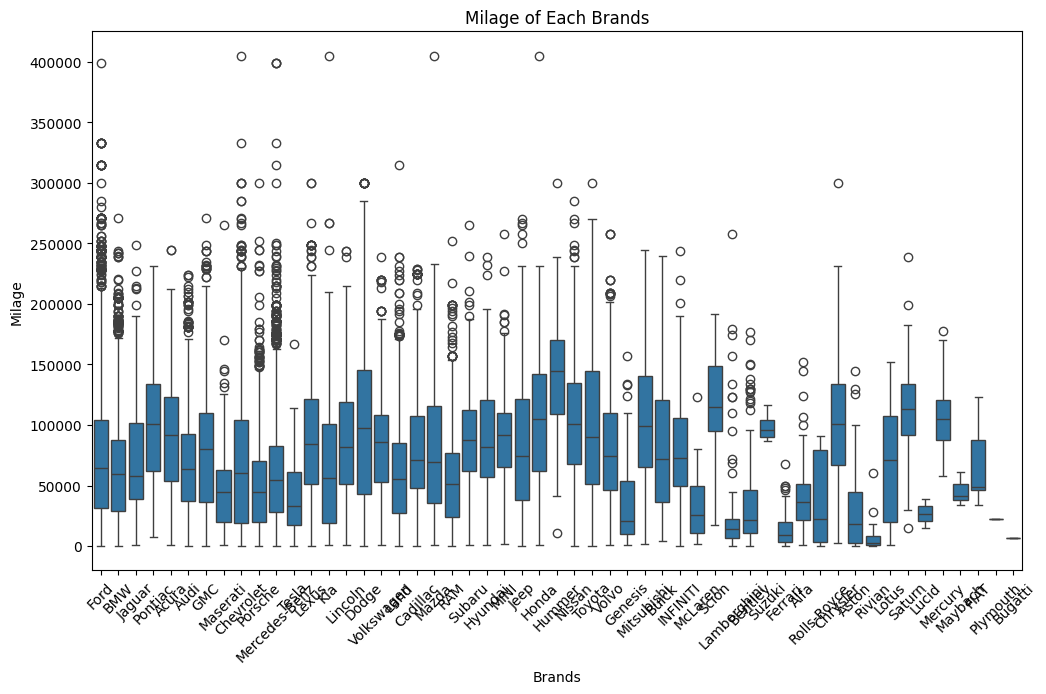

In [23]:
plt.figure(figsize=(12,7))
sns.boxplot(x='brand',y='milage',data=train)
plt.xticks(rotation=45)
plt.xlabel('Brands')
plt.ylabel('Milage')
plt.title('Milage of Each Brands')       

Here, The Brands which give high milage are Ford, Maserati, Porsche, Kai, Cadlillac, Jeep

Text(0.5, 1.0, 'Milage of Each Fuel Type')

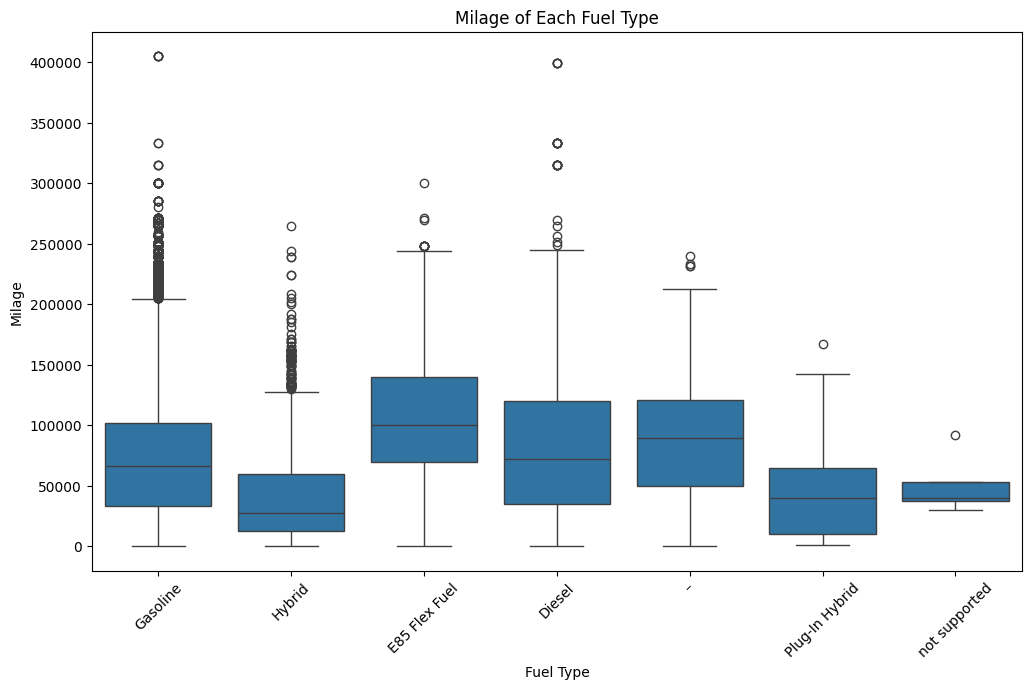

In [24]:
plt.figure(figsize=(12,7))
sns.boxplot(x='fuel_type',y='milage',data=train)
plt.xticks(rotation=45)
plt.xlabel('Fuel Type')
plt.ylabel('Milage')
plt.title('Milage of Each Fuel Type')       

Fuel Type Gasoline and Diesel have high milage

In [25]:
train['accident'].nunique()

2

<Axes: xlabel='accident', ylabel='count'>

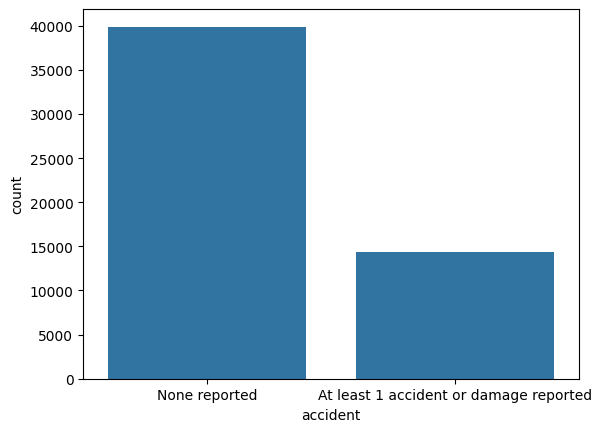

In [26]:
sns.countplot(x='accident',data=train,)

Text(0.5, 1.0, 'Accident report of brands')

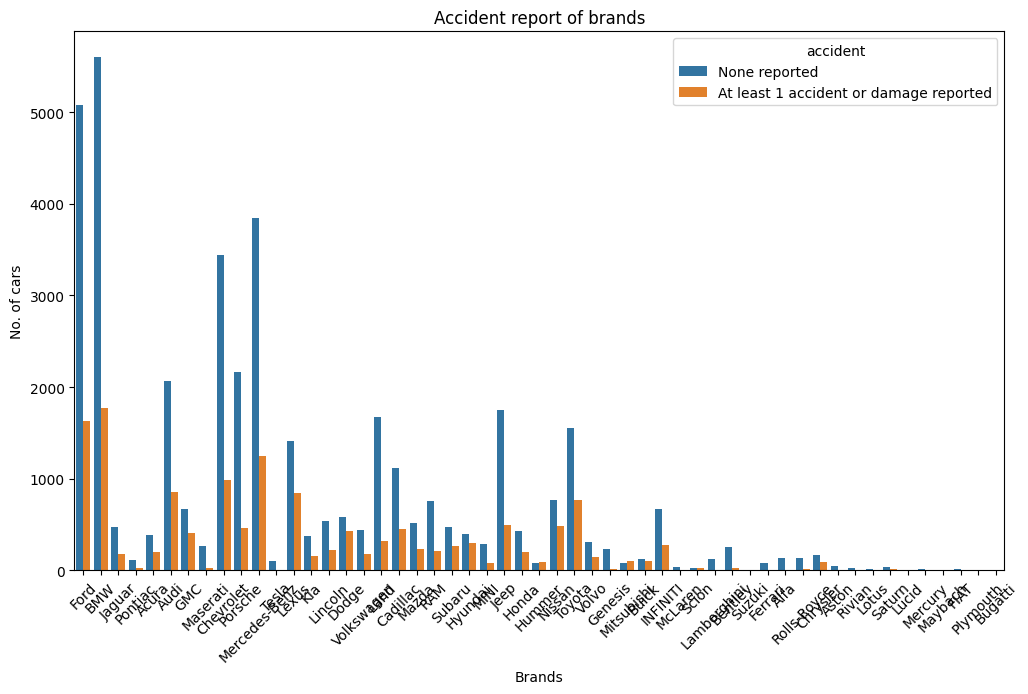

In [27]:
plt.figure(figsize=(12,7))
sns.countplot(x='brand',data=train,hue='accident')
plt.xticks(rotation=45)
plt.xlabel('Brands')
plt.ylabel('No. of cars')
plt.title('Accident report of brands')       

# Feature Transformation

In [28]:
# now applying label encoder in categorical data
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [29]:
train.select_dtypes(include='object').columns

Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')

In [30]:
cols = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident','clean_title']
for col in cols:
    train[col] = lbe.fit_transform(train[col])

In [31]:
train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,14,644,2018,74349,2,719,2,26,57,1,0,11000
1,4,49,2007,80000,2,534,18,17,9,1,0,8250
2,21,1771,2009,91491,2,541,14,181,6,1,0,15000
3,4,1748,2022,2437,3,646,43,100,24,1,0,63500
4,40,693,2001,111000,2,219,34,249,9,1,0,7850


# Model and Prediction

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import accuracy_score, root_mean_squared_error,make_scorer
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.pipeline import Pipeline

In [34]:
#define features and target
X = train.drop('price',axis=1)
y= train['price']

In [35]:
#now scaling the data 
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

#dividing the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#now scaling the feature and label of data
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [36]:
#defining preprocessing steps
#transforming features with Powertransformer to reduce skewness
#using robustscaler to reduce the impact of outliers
preprocessing = Pipeline([
    ('transform', PowerTransformer(method='yeo-johnson')),
    ('scale', RobustScaler())
])

In [37]:
X_train = preprocessing.fit_transform(X_train)

In [38]:
#defining base models
rf = RandomForestRegressor( random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state= 42)

In [39]:
#hyperparameter tuning for each base model
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [40]:
#using rmse for scoring
rmse = make_scorer(root_mean_squared_error, greater_is_better=False)
#set up K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [41]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [42]:
# grid search for RandomForest
random_search_rf = RandomizedSearchCV(rf, param_grid_rf, cv=kf, scoring=rmse, n_jobs=-1)
random_search_rf.fit(X_train, y_train)
best_rf = random_search_rf.best_estimator_

In [43]:
#grid search for GradientBoosting
random_search_gbr = RandomizedSearchCV(gbr, param_grid_gbr, cv=kf, scoring=rmse, n_jobs=-1)
random_search_gbr.fit(X_train, y_train)
random_gbr = random_search_gbr.best_estimator_

In [44]:
#grid search for XGBoost
random_search_xgb = RandomizedSearchCV(gbr, param_grid_xgb, cv=kf, scoring=rmse, n_jobs=-1)
random_search_xgb.fit(X_train, y_train)
random_best_xgb = random_search_gbr.best_estimator_

In [45]:
best_rf

RandomForestRegressor(max_depth=10, min_samples_leaf=4, n_estimators=200,
                      random_state=42)

In [46]:
random_gbr

GradientBoostingRegressor(learning_rate=0.01, n_estimators=300, random_state=42)

In [47]:
random_best_xgb

GradientBoostingRegressor(learning_rate=0.01, n_estimators=300, random_state=42)

In [48]:
# ensemble the models using VotingRegressor
ensemble = VotingRegressor(estimators=[
    ('rf', best_rf),
    ('gbr', random_search_gbr),
    ('xgb', random_search_xgb)
])

In [55]:
ensemble_scores = cross_val_score(ensemble, X, y, cv=kf, scoring=rmse)

In [56]:
print(f'Cross-Validation RMSE Scores: {-ensemble_scores}')
print(f'Mean RMSE: {-np.mean(ensemble_scores)}')
print(f'Standard Deviation of RMSE: {np.std(ensemble_scores)}')

Cross-Validation RMSE Scores: [48692.62739985 70252.37302899 87766.61784138 57669.84806897
 72444.03224183]
Mean RMSE: 67365.09971620471
Standard Deviation of RMSE: 13364.228159551023


In [57]:
# Fit the ensemble model
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=10,
                                                   min_samples_leaf=4,
                                                   n_estimators=200,
                                                   random_state=42)),
                            ('gbr',
                             RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                                                estimator=GradientBoostingRegressor(random_state=42),
                                                n_jobs=-1,
                                                param_distributions={'learning_rate': [0.01,
                                                                                       0.1,
                                                                                       0.2],
                                                                     'max_depth': [3,
                                                                                   5,
                                                                                   7],
                                                                     'n_estimators': [...
                                                scoring=make_scorer(root_mean_squared_error, greater_is_better=False, response_method='predict'))),
                            ('xgb',
                             RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                                                estimator=GradientBoostingRegressor(random_state=42),
                                                n_jobs=-1,
                                                param_distributions={'learning_rate': [0.01,
                                                                                       0.1,
                                                                                       0.2],
                                                                     'max_depth': [3,
                                                                                   5,
                                                                                   7],
                                                                     'n_estimators': [100,
                                                                                      200,
                                                                                      300]},
                                                scoring=make_scorer(root_mean_squared_error, greater_is_better=False, response_method='predict')))])

In [58]:
X_test = preprocessing.transform(X_test)

In [ ]:
y_pred = ensemble.predict(X_test)

In [61]:
cols = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident','clean_title']
for col in cols:
    test[col] = lbe.fit_transform(test[col])

In [62]:
test_data = scalar.transform(test)


In [63]:
test_data = preprocessing.transform(test_data)

In [64]:
prediction = ensemble.predict(test_data)

In [65]:
prediction

array([23905.24660899, 19252.94318463, 26005.77310103, ...,
       13096.66696989, 50805.09462118, 16290.01645571])

In [72]:
#Droping the index
prediction = pd.Series(prediction).reset_index(drop=True)
test_ID = pd.Series(test_ID).reset_index(drop=True)

In [76]:
output = pd.DataFrame({
    'Test_ID': test_ID,
    'Predicted_Price': prediction
})

In [77]:
output

,Test_ID,Predicted_Price
0,54273,23905.246609
1,54274,19252.943185
2,54275,26005.773101
3,54276,59700.498202
4,54277,37228.803756
...,...,...
36178,90451,74292.111662
36179,90452,14514.762637
36180,90453,13096.666970
36181,90454,50805.094621


In [81]:
# Save the DataFrame to a CSV file
#output.to_csv('Output_price.csv', index=False)